In [1]:
from helpers import *
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, ConnectionStyle
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# plot two vectors, calculate slope between
# then see if can get angle to match .. 

vec1 = ((0,0), (1,4))
vec2 = ((0,0), (4,2))

vec1_curve = FancyArrowPatch(posA=vec1[0], posB=vec1[1], color="red")
vec2_curve = FancyArrowPatch(posA=vec2[0], posB=vec2[1], color="green")

In [3]:
def angle_between_vectors(v, w):
    dot_product = np.dot(v, w)
    v_magnitude = np.linalg.norm(v)
    w_magnitude = np.linalg.norm(w)
    cos_theta = dot_product / (v_magnitude * w_magnitude)
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees, angle_radians

In [4]:
deg, rad = angle_between_vectors(np.array(vec1[1]), np.array(vec2[1]))
deg, rad

(49.398705354995535, 0.8621700546672264)

In [5]:
c = ConnectionStyle("arc3,rad=0.3")
c.rad

0.3

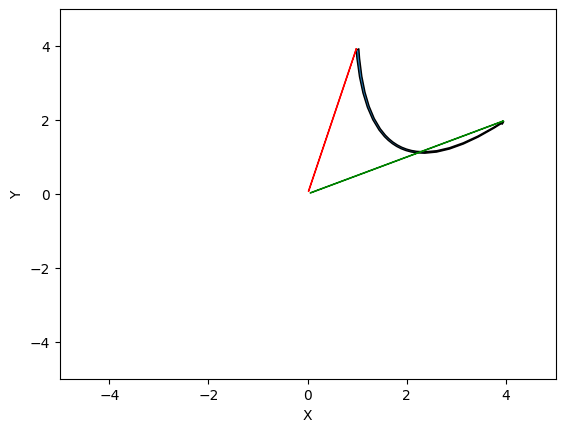

In [6]:


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Define the start and end points of the curve
x_start, y_start  = vec1[1]
x_end, y_end = vec2[1]


# c = ConnectionStyle("Angle3", angleA=90, angleB=70)



# Create a FancycurvePatch object
curve = FancyArrowPatch((x_start, y_start), (x_end, y_end), arrowstyle='fancy', mutation_scale=5, connectionstyle=f"arc3,rad={rad}")

# Add the curve to the plot
ax.add_patch(curve)
ax.add_patch(vec1_curve)
ax.add_patch(vec2_curve)

# Set plot limits
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])


# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

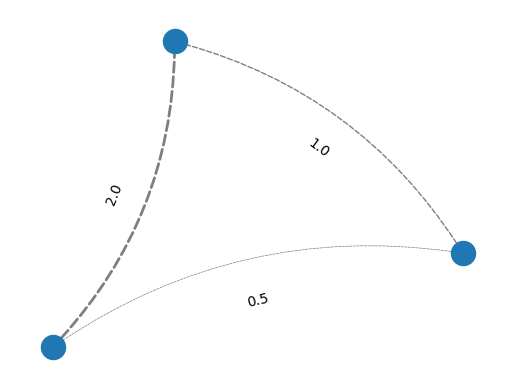

In [7]:
# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3])

# Add edges with weight attribute
G.add_edge(1, 2, weight=0.5)
G.add_edge(2, 3, weight=2.0)
G.add_edge(1, 3, weight=1.0)

# Create a layout for our nodes
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos)

# Draw curved edges
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color='k', style='dashed', alpha=0.5, connectionstyle="arc3,rad=0.2", arrows=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.axis('off')
plt.show()